In [1]:
from src.utils.compare_solutions import load_competiton_solution, load_my_solution, load_my_solution_layer, plot_diff_heatmap, plot_one_unit, unpack_lp_solution
import numpy as np
import torch
import pickle
from src.ed_models.ed_model_lp_scipy import EDModelLP

In [2]:
output_path = "../data/Train_Data/instance_2021_Q1_1/OutputData.json"
ref_sol = load_competiton_solution(output_path)
my_solution_path ="../tests/ed_model_lp_solution.pkl"
with open(my_solution_path, "rb") as f:
    my_sol_raw = pickle.load(f)

In [3]:
sample_path = "../data/Train_Data/instance_2021_Q1_1/InputData.json"
ed_model = EDModelLP(instance_path=sample_path)
my_sol = unpack_lp_solution(my_sol_raw, ed_model)

In [4]:
my_sol["thermal_units_names"] == ref_sol["thermal_units_names"]

True

In [5]:
for key, value in ref_sol.items():
    if key not in ["thermal_units_names", "profiled_units_names", "storage_units_names"]:
        a = ref_sol[key]
        b = my_sol[key] if isinstance(my_sol[key], np.ndarray) else my_sol[key].cpu().numpy()
        comparison = np.isclose(
            a, b, atol=1e-4
        )
        accuracy =100 * np.sum(comparison) / comparison.size
        print(f"Variable: {key}, Accuracy: {accuracy:.4f}")

Variable: profiled_generation, Accuracy: 100.0000
Variable: thermal_generation, Accuracy: 99.4553
Variable: charge_rate, Accuracy: 93.4524
Variable: discharge_rate, Accuracy: 94.4444
Variable: storage_level, Accuracy: 79.0675
Variable: curtailment, Accuracy: 100.0000


In [18]:
len(ref_sol["profiled_units_names"])

17

In [19]:
for row in range(1, len(ref_sol["profiled_generation"])):
    print(np.where(ref_sol["profiled_generation"][row, :] != ref_sol["profiled_generation"][row-1, :]))

(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(array([15, 16]),)
(ar

In [23]:
for row in range(len(ref_sol["profiled_generation"])):
    print(ref_sol["profiled_generation"][row, 15])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09811
7.38985
45.92225
88.63297
121.93571
138.9166
132.97966
107.83232
69.65564
23.67513
0.42359
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.11659
7.68791
43.76306
84.94211
119.29781
137.3019
135.59996
114.65524
76.25934
27.82323
0.60452
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.16851
8.60669
46.98596
90.48599
121.97017
133.31642
127.911
106.02017
70.12319
26.2832
0.73607
0.0
0.0
0.0
0.0
0.0


ValueError: The number of FixedLocator locations (72), usually from a call to set_ticks, does not match the number of labels (14).

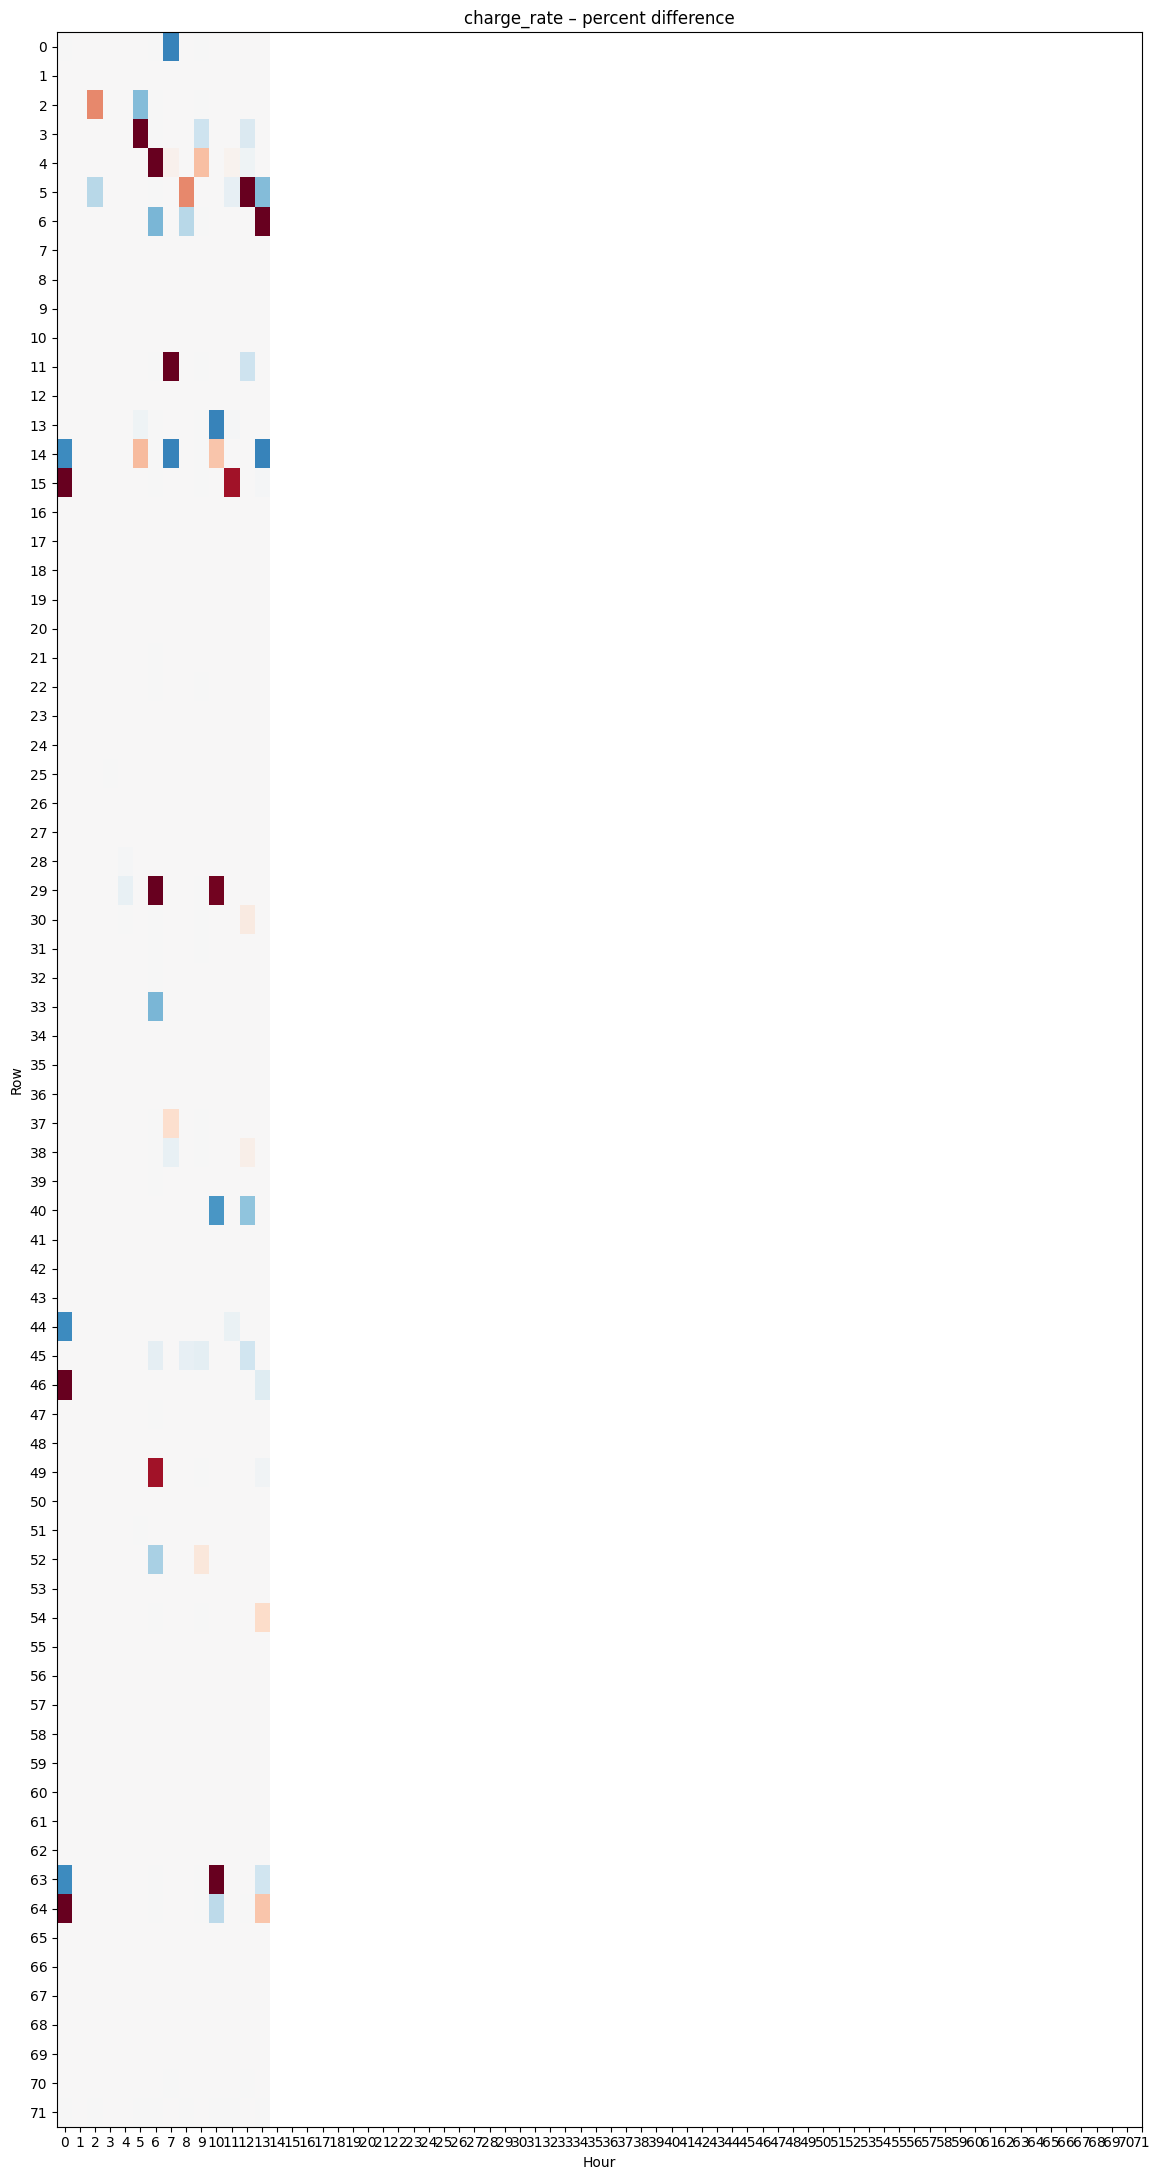

In [8]:
plot_diff_heatmap("charge_rate", my_sol, ref_sol)

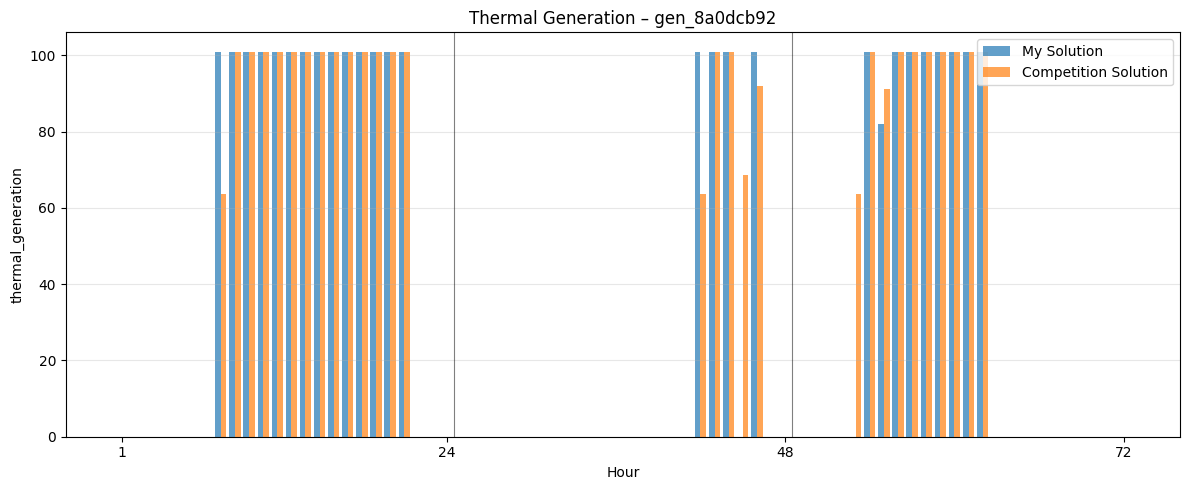

In [ ]:
plot_one_unit("thermal_generation", "gen_8a0dcb92", my_sol, ref_sol)